<a href="https://colab.research.google.com/github/UIT-19521183/CS114.L21/blob/main/Recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Train model cho bài toán hand-written digits recognition theo example của sklearn

In [7]:
print(__doc__)
 
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
 
# Standard scientific Python imports
import matplotlib.pyplot as plt
 
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


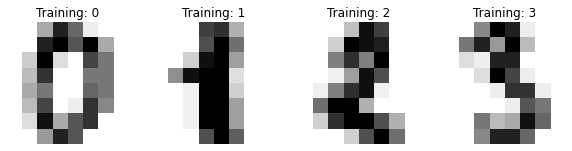

In [8]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [9]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [10]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


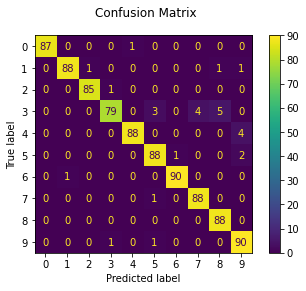

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#Thử nghiệm của nhóm tìm ra cách xử lý hình ảnh chụp từ camera colab để thực hiện predict

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
 
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


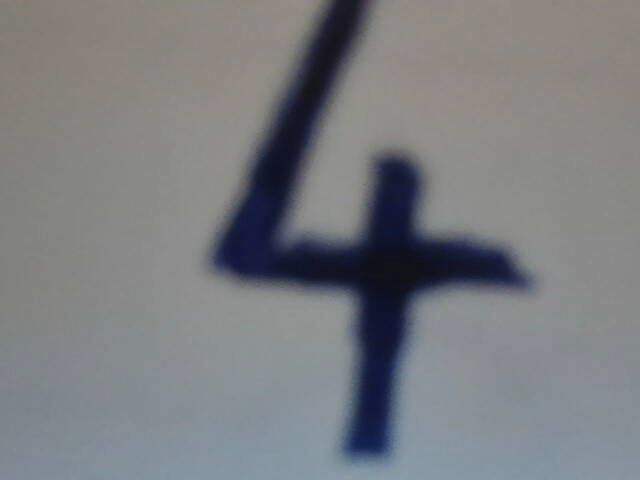

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  #Nguồn: https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab

In [ ]:
import cv2

In [ ]:
image = cv2.imread('photo.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
ret, thresh_binary = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
resize1 = cv2.resize(thresh_binary, (8, 8), interpolation = cv2.INTER_AREA)
norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
reshape = norm_image.reshape(-1, 64)

NameError: ignored

In [ ]:
reshape.shape

(1, 64)

In [ ]:
print(reshape)

[[ 0.         0.         0.         1.8518518  8.580247   0.
   0.         0.         0.         0.         0.         7.2222223
   3.3950617  0.         0.         0.         0.         0.
   0.        11.172839   2.4691358  1.5432099  0.         0.
   0.         0.         1.9753087 10.987655   7.0987654  5.123457
   0.         0.         0.         0.         3.3950617 12.283951
  15.        14.012345   5.987654   0.         0.         0.
   0.         0.         9.012345   2.0370371  0.         0.
   0.         0.         0.         0.         8.765432   0.
   0.         0.         0.         0.         0.         0.
   5.8024693  0.         0.         0.       ]]


In [ ]:
predict = clf.predict(reshape)
print(predict)

[4]


In [2]:
#Các thư viện xử lý ảnh
from IPython.display import Image
from google.colab.patches import cv2_imshow
import os
import numpy as np

In [3]:
#Mount drive to save image
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
a=np.array([1,2,3])
b=[]
b.append(a)
b=np.array(b)
print(type(b))

<class 'numpy.ndarray'>


#Tạo test set với 27 ảnh chụp thực tế

##Chụp trực tiếp từ colab

In [ ]:
def get_photo(name):
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    #display(Image(filename))
    #save image to drive 
      #https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/
    directory = r'/content/gdrive/MyDrive/Colab_file/Recognizing-hand-written-digits'
    os.chdir(directory)
    img=cv2.imread(filename)
    cv2.imwrite(name, img)
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
    #Nguồn: https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab
  return 0

In [ ]:
#Tạo dữ liệu dự đoán
def create_image(num_of_img):
  data=[]
  for i in ['one','two','three','four','five','six','seven','eight','nine']:
    for j in range(num_of_img):
      x=get_photo(i+str(j)+".png")
      data.append(x)
  data=np.array(data)
  return data

##Chụp từ smartphone
Vì camera của của colab thông qua laptop chụp ảnh không thuận tiện, những trường hợp sau data sẽ được load lên ảnh đã được nhóm thu thập trên smartphone và upload lên drive

###Hàm load ảnh lên từ drive

In [4]:
#https://www.codegrepper.com/code-examples/python/how+to+load+images+from+folder+in+python
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


###Tạo ra một bản sao của ảnh với định dạng phù hợp với matplotlib
Vì matplotlib dễ dàng và trực quan hơn so với cv2 trong việc biểu diễn hình ảnh, cũng như biểu diễn nhiều hình ảnh cùng một lúc. Nên ta sẽ biểu diễn tất cả hình ảnh đã load lên từ drive bằng matplotlib.

In [5]:
from PIL import Image
folder="/content/gdrive/MyDrive/Colab_file/Recognizing-hand-written-digits"
image_data=load_images_from_folder(folder)
image_PIL=[]
for i in image_data:
  image_PIL.append(Image.fromarray(i))

###Bộ ảnh test set
Bên dưới là bộ test set 27 ảnh từ 1-9, mỗi chữ số là 3 ảnh khác nhau với kiểu viết khác nhau

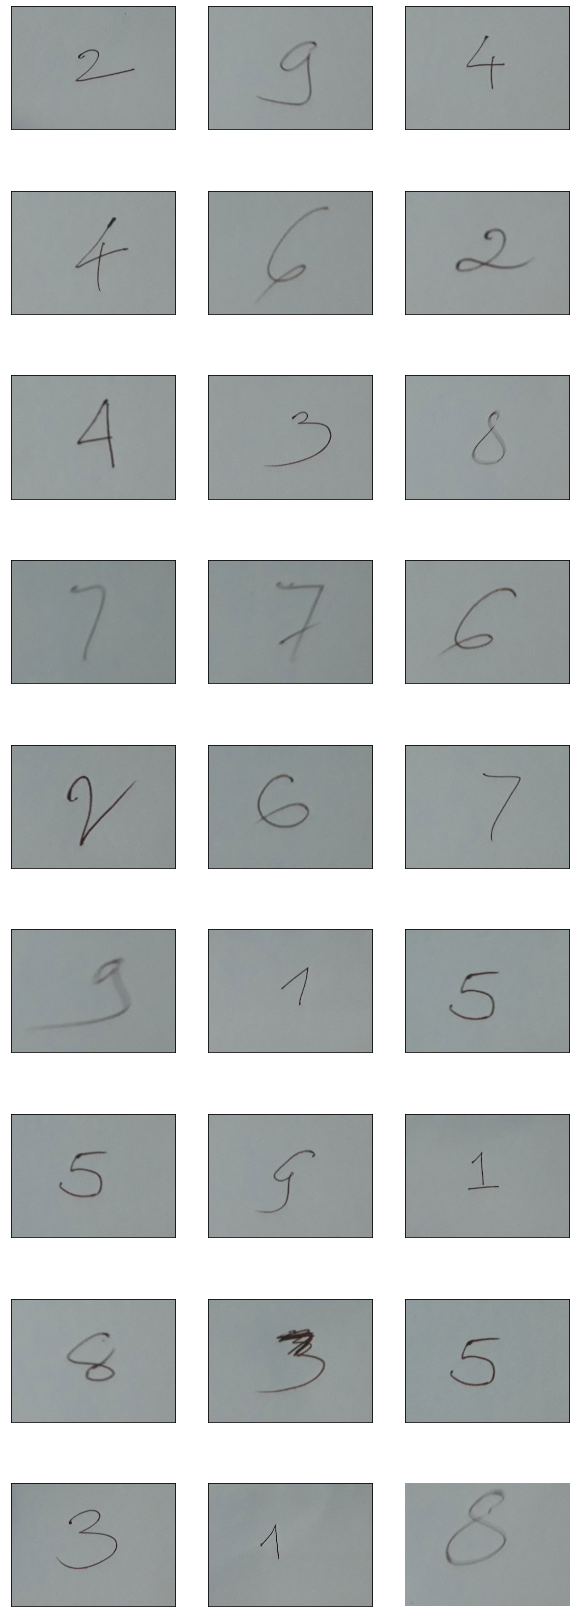

In [11]:

#Show_all image muốn predict
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(9, 3,figsize=(10,30))
plt.axis('off')
for i in range(9):
  for j in range(3):
    axs[i][j].imshow(image_PIL[i*3+j])
    axs[i][j].axes.get_xaxis().set_visible(False)
    axs[i][j].axes.get_yaxis().set_visible(False)

###Gán label

In [196]:
#Dựa vào data
label=[2,9,4,4,6,2,4,3,8,7,7,6,2,6,7,9,1,5,5,9,1,8,3,5,3,1,8]

###Hàm display hình ảnh với ảnh đưa vào là 1 array
Do muốn display hình ảnh sau khi xử lý một vài khâu để quan sát sự biến đổi của hình ảnh, nhóm đã dự định sử dụng matplotlib như trước nhưng đã gặp phải một số vấn đề.
<br>
Trong quá trình thử nghiệm, sau khi xử lý ảnh bằng cv2 (ví dụ: gray scale) thì khi biểu diễn ảnh bằng pyplot thì ảnh bị biến đổi? Nên nhóm quyết định sử dụng cv2_imshow để biểu diễn ảnh. 
<br>
cv2_imshow thường biểu diễn ảnh lên màn hình với kích thức thực của nó nên rất khó quan sát do ảnh đã xử lý có nhiều kích thước khác nhau hoặc ảnh quá lớn, quá nhỏ,... khó quan sát cùng lúc để so sánh.
<br>
Nên ta sẽ giảm/tăng kích thước ảnh hợp lý để biểu diễn ảnh.

In [13]:
#https://stackoverflow.com/questions/35180764/opencv-python-image-too-big-to-display
def show_image(image_arr,scale_percent):
  width = int(image_arr.shape[1] * scale_percent / 100)
  height = int(image_arr.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(image_arr, dim, interpolation = cv2.INTER_AREA)
  cv2_imshow(resized)


###Vẽ đồ thị grayscale
Đồ thị grayscale có thể giúp ta tìm được threshold của các ảnh
Dựa theo đồ thị bên dưới threshold của ảnh rơi vào khoảng 110-130

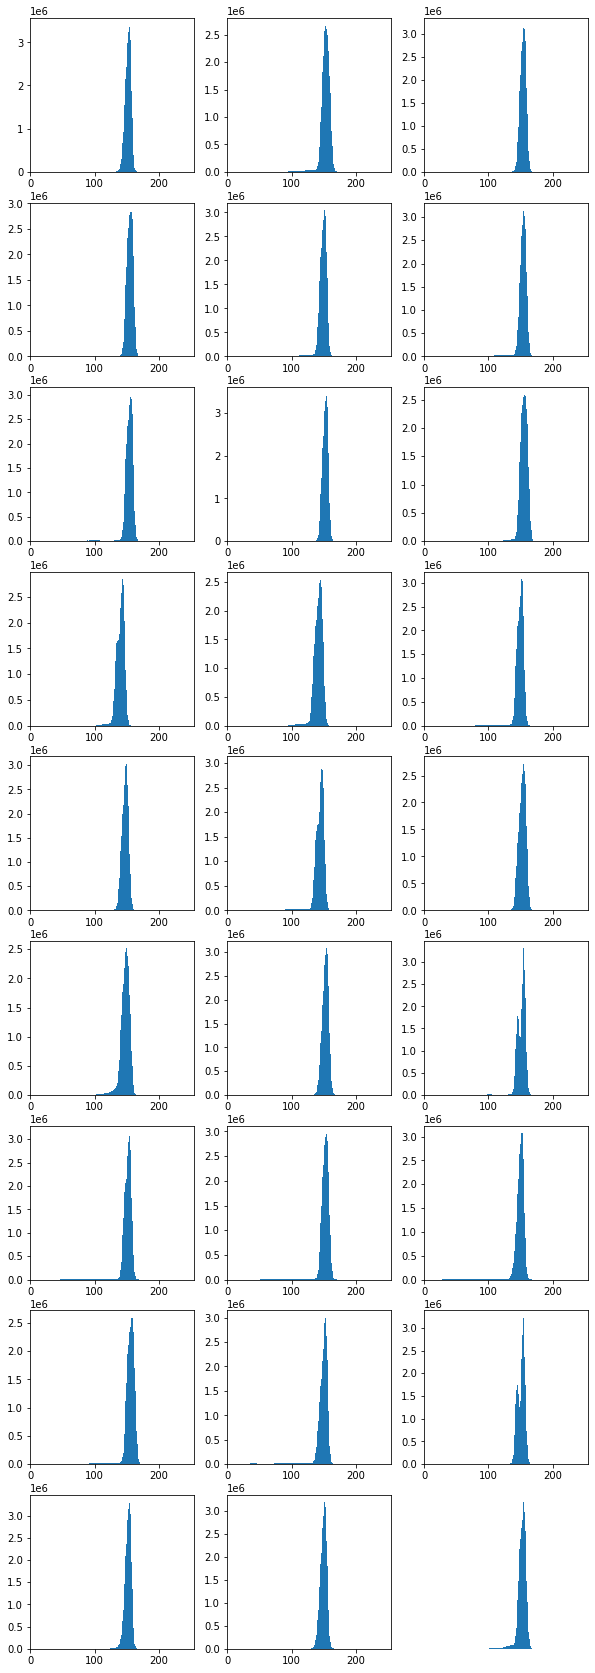

In [333]:
#Create grayscale histogram
#https://datacarpentry.org/image-processing/05-creating-histograms/
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html
from matplotlib import pyplot as plt
%matplotlib inline
"""im=image_data[25]
plt.hist(im.ravel(),256,[0,256]); plt.show()"""
fig, axs = plt.subplots(9, 3,figsize=(10,30))
plt.axis('off')
for i in range(9):
  for j in range(3):
    im=image_data[i*3+j]
    axs[i][j].hist(im.ravel(),256,[0,256]);
    axs[i][j].set_xlim([0,255])
    #axs[i][j].axes.get_xaxis().set_visible(False)
    #axs[i][j].axes.get_yaxis().set_visible(False)
    #axs.title("Label: "+str(label[i*3+j]))
plt.show()


###Xử lý ảnh/dữ liệu
Phần xử lý đã được nhóm nhắc tới trong phần thử nghiệm đầu tiên của nhóm với 1 ảnh chụp trực tiếp từ camera colab.
<br>
Phần xử lý bao gồm:
* Gray scale - chuyển ảnh sang ảnh xám
* Threshold để tách nền tăng độ chính xác: Do ảnh chụp bị ảnh hưởng bởi nhiều yếu tố (ánh sáng...) làm giảm độ chính xác, cần tách số ra và chỉnh giá trị nền thành 255
* Threshold tăng giá trị điểm ảnh xong rồi invert ảnh: 
* Norm giá trị ảnh xuống từ 0 đến 255 thành từ 0 đến 15: Do array dữ liệu ảnh trong dataset hand-writting digits pixel có giá trị từ [0,15]
* Reshape sang array (1,64): SVC nhập đầu vào dữ liệu để predict là vector 



In [257]:
#Xử lý data
def data_processing(img):
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, thresh_binary = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
  ret, thresh_binary2 = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
  resize1 = cv2.resize(thresh_binary2, (8, 8), interpolation = cv2.INTER_AREA)
  display_3_status(image,thresh_binary,thresh_binary2,resize1)
  #display_3_status(image,thresh_binary,thresh_binary,resize1)
  norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  reshape = norm_image.reshape(-1, 64)
  return reshape

###Display 4 trạng thái của input để quan sát
4 trạng thái bao gồm:
* Ảnh gốc
* Ảnh sau khi threshold lần 1
* Ảnh sau khi threshold lần 2
* Ảnh sau khi resize thành kích thước như dataset dùng để training model

In [20]:
import numpy as np
def display_3_status(im1,im2,im3,im4):
  x=np.concatenate((im1,im2,im3),axis=1)
  show_image(x,5)
  show_image(im4,2580)
  return 0

###Hàm chính để quan sát 4 trạng thái trong lúc xử lý ảnh + kết quả khi predict bằng model SVC + Label thực tế của dữ liệu

In [199]:
label=[2,9,4,4,6,2,4,3,8,7,7,6,2,6,7,9,1,5,5,9,1,8,3,5,3,1,8]
def result_predicted(img,i):
  reshape=data_processing(img)
  predicted=clf.predict(reshape)
  x=predicted
  print("Result predicted:",predicted)
  print("Real label:",label[i])
  return x


#Kết quả dự đoán 27 số đã chụp
Hàng đầu tiên: Ảnh gốc - Ảnh qua threshold lần 1 - Ảnh qua threshold lần 2
<br>
Hàng thứ 2: Ảnh đã qua resize (8x8) đã được phóng to lên 25.8 lần cho dễ nhìn.

In [286]:
#Lưu lại kết quả predict
pre=[]

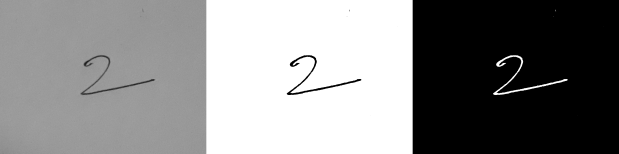

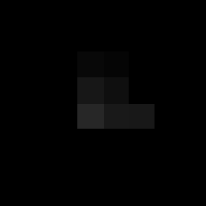

Result predicted: [7]
Real label: 2


In [287]:
pre.append(result_predicted(image_data[0],0))

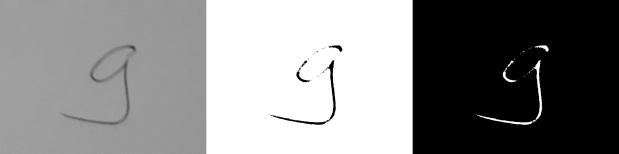

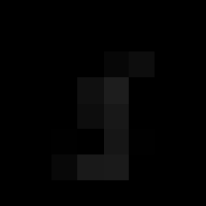

Result predicted: [1]
Real label: 9


In [288]:
pre.append(result_predicted(image_data[1],1))

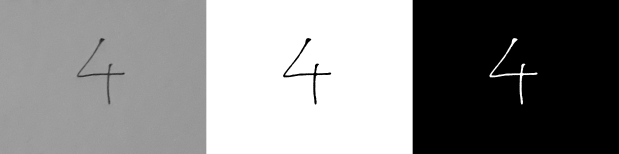

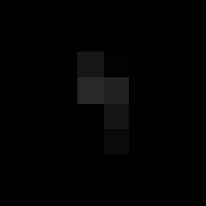

Result predicted: [1]
Real label: 4


In [289]:
pre.append(result_predicted(image_data[2],2))

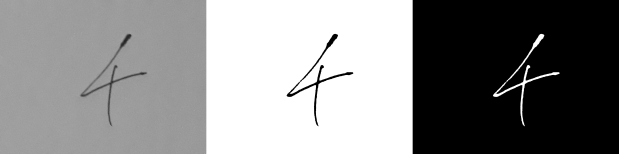

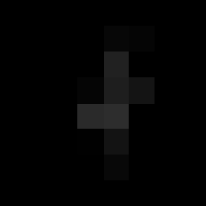

Result predicted: [7]
Real label: 4


In [290]:
pre.append(result_predicted(image_data[3],3))

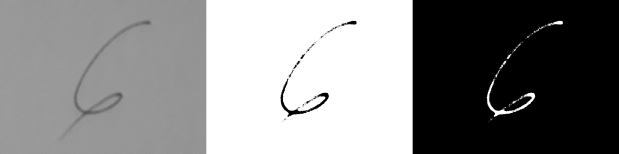

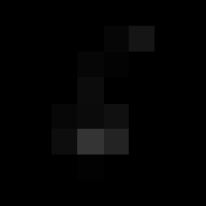

Result predicted: [7]
Real label: 6


In [291]:
pre.append(result_predicted(image_data[4],4))

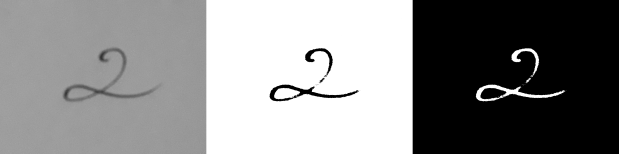

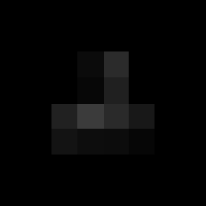

Result predicted: [7]
Real label: 2


In [292]:
pre.append(result_predicted(image_data[5],5))

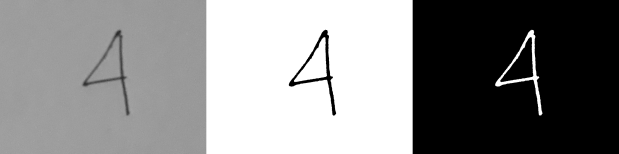

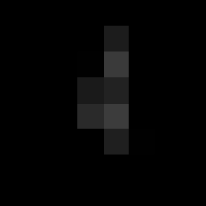

Result predicted: [1]
Real label: 4


In [293]:
pre.append(result_predicted(image_data[6],6))

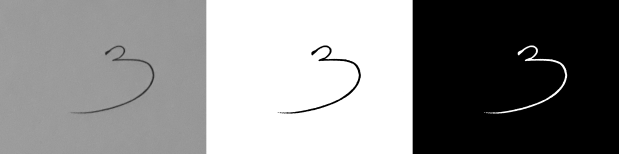

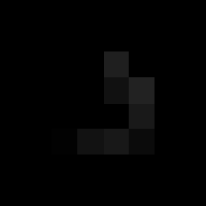

Result predicted: [7]
Real label: 3


In [294]:
pre.append(result_predicted(image_data[7],7))

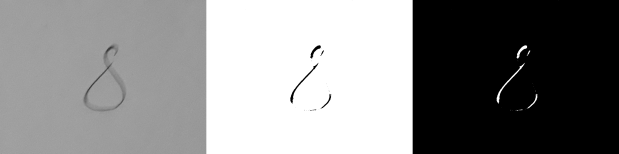

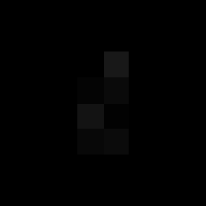

Result predicted: [7]
Real label: 8


In [295]:
pre.append(result_predicted(image_data[8],8))

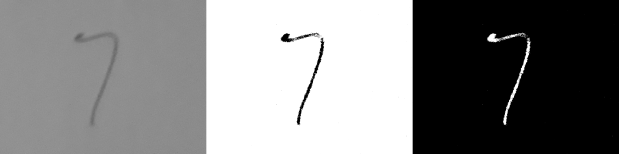

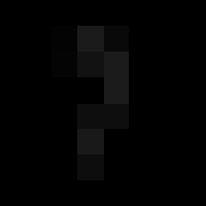

Result predicted: [7]
Real label: 7


In [296]:
pre.append(result_predicted(image_data[9],9))

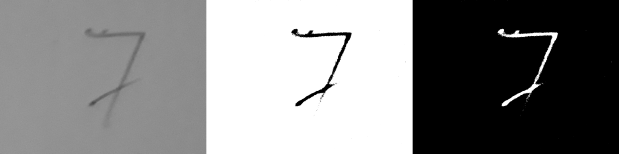

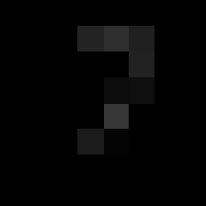

Result predicted: [7]
Real label: 7


In [297]:
pre.append(result_predicted(image_data[10],10))

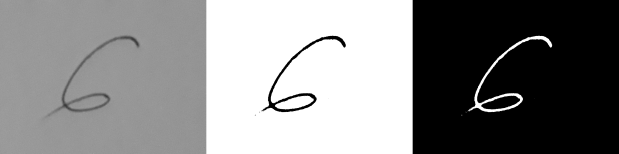

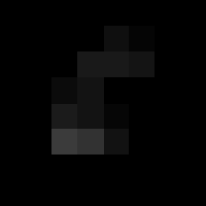

Result predicted: [4]
Real label: 6


In [298]:
pre.append(result_predicted(image_data[11],11))

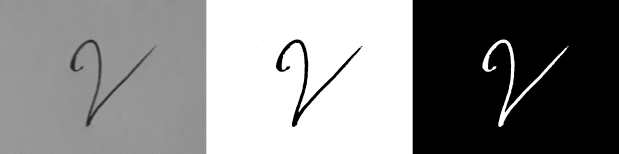

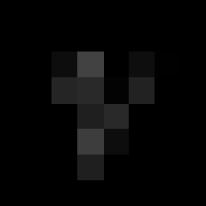

Result predicted: [4]
Real label: 2


In [299]:
pre.append(result_predicted(image_data[12],12))

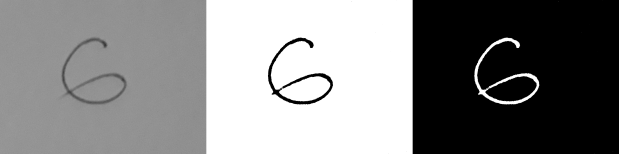

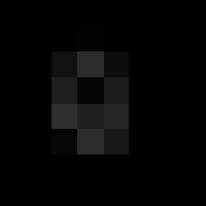

Result predicted: [4]
Real label: 6


In [300]:
pre.append(result_predicted(image_data[13],13))

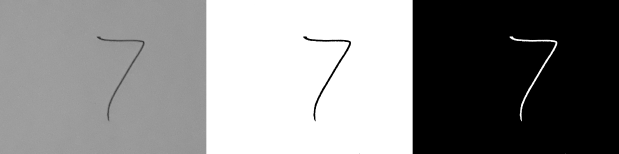

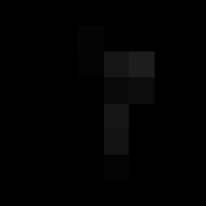

Result predicted: [1]
Real label: 7


In [301]:
pre.append(result_predicted(image_data[14],14))

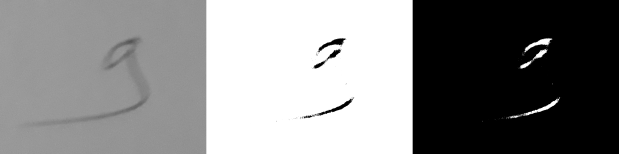

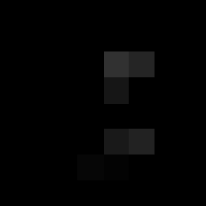

Result predicted: [9]
Real label: 9


In [302]:
pre.append(result_predicted(image_data[15],15))

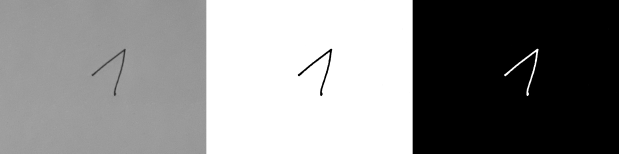

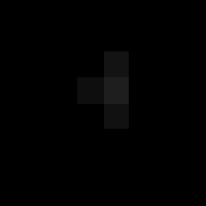

Result predicted: [9]
Real label: 1


In [303]:
pre.append(result_predicted(image_data[16],16))

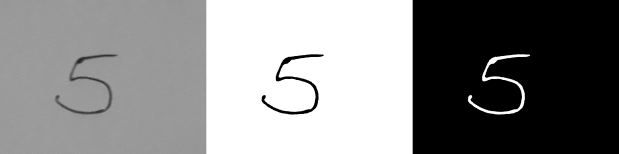

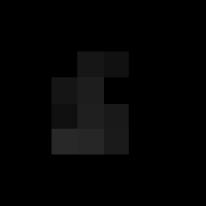

Result predicted: [4]
Real label: 5


In [304]:
pre.append(result_predicted(image_data[17],17))

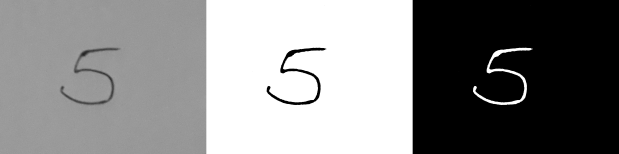

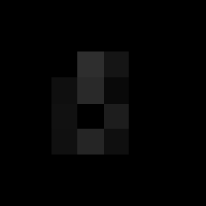

Result predicted: [1]
Real label: 5


In [305]:
pre.append(result_predicted(image_data[18],18))

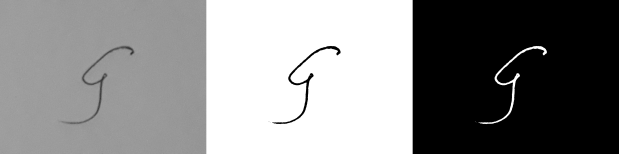

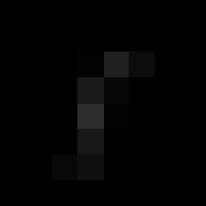

Result predicted: [8]
Real label: 9


In [306]:
pre.append(result_predicted(image_data[19],19))

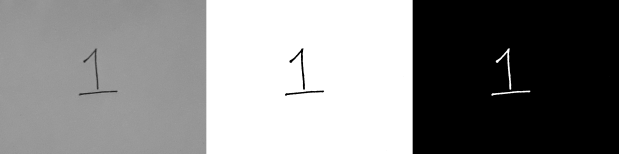

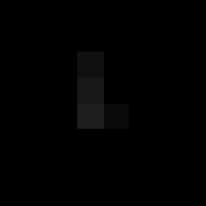

Result predicted: [1]
Real label: 1


In [307]:
pre.append(result_predicted(image_data[20],20))

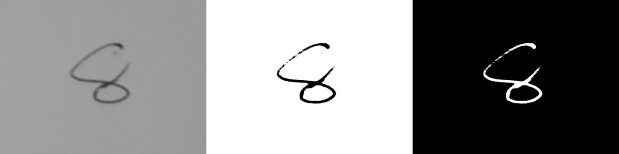

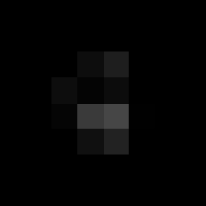

Result predicted: [7]
Real label: 8


In [308]:
pre.append(result_predicted(image_data[21],21))

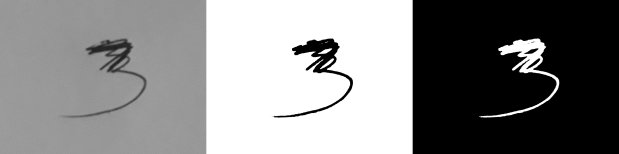

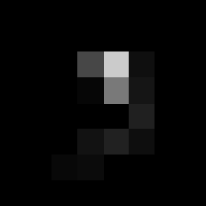

Result predicted: [9]
Real label: 3


In [309]:
pre.append(result_predicted(image_data[22],22))

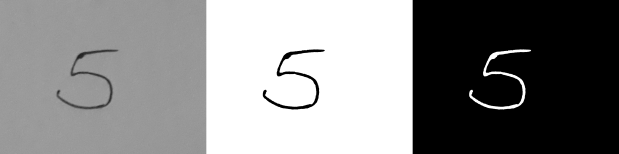

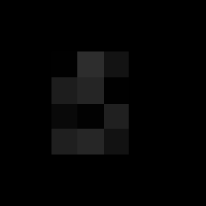

Result predicted: [4]
Real label: 5


In [310]:
pre.append(result_predicted(image_data[23],23))

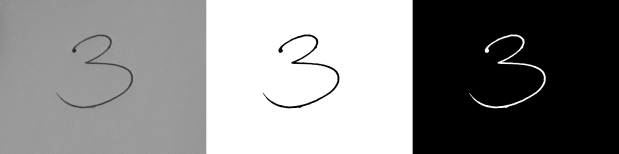

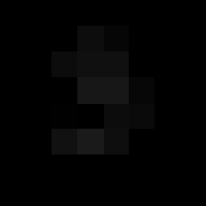

Result predicted: [1]
Real label: 3


In [311]:
pre.append(result_predicted(image_data[24],24))

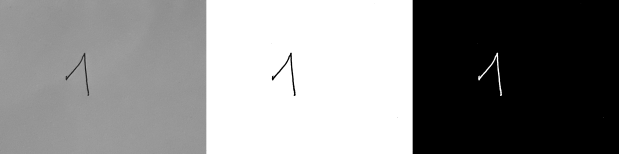

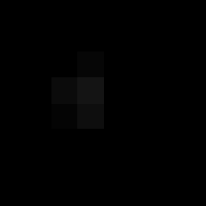

Result predicted: [9]
Real label: 1


In [312]:
pre.append(result_predicted(image_data[25],25))

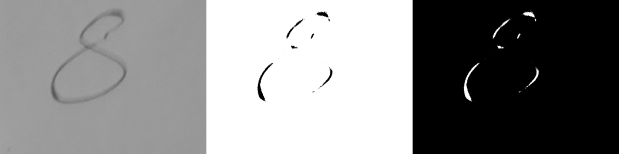

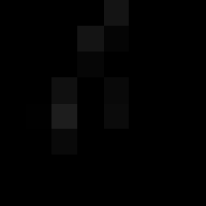

Result predicted: [7]
Real label: 8


In [313]:
pre.append(result_predicted(image_data[26],26))

#Đánh giá độ chính xác

Giả sử rằng 27 số trên là 1 test set. Dùng một số phương pháp đơn giản: Accuracy

In [314]:
for i in range(len(pre)):
  pre[i]=pre[i][0]

In [315]:
print(pre)

[7, 1, 1, 7, 7, 7, 1, 7, 7, 7, 7, 4, 4, 4, 1, 9, 9, 4, 1, 8, 1, 7, 9, 4, 1, 9, 7]


In [316]:
from sklearn.metrics import accuracy_score
print("Accuracy of new test set: {}".format(accuracy_score(label,pre)))

Accuracy of new test set: 0.14814814814814814


Đếm số lượng predict khớp với real label

In [317]:
sl_true=0
for i in range(len(label)):
  if(label[i]==pre[i]):
    sl_true+=1
print("So luong predict khop voi real label:",sl_true)

So luong predict khop voi real label: 4


#Kết luận
1. Với mắt thường ta cũng có thể thấy được, với ảnh chụp thực tế cùng chữ số viết tay, kết quả đưa ra khá tệ, không chính xác.
2. Bằng chứng là nhìn vào 27 ảnh đã dự đoán ở trên với accuracy là: 0.0.14814814814814814. Hay chỉ có 4 ảnh dự đoán đúng với label thực sự của nó trong 27 ảnh đã đem đi predict.
3. Lý do không tốt: Dữ liệu không đồng nhất vì 1 số lý do: độ phân giải camera khác biệt, khi resize lại ảnh đã chụp thì ảnh sẽ bị biến đổi rất nhiều như ta đã thấy trong phần display.
4. Không thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà. Nếu muốn sử dụng nó thì buộc lòng phải có dataset mới để training model
